# **Clone The Data**

In [ ]:
!git clone https://github.com/5hyfilm/2110571-nn-project

Cloning into '2110571-nn-project'...
remote: Enumerating objects: 4363, done.
remote: Counting objects: 100% (2549/2549), done.
remote: Compressing objects: 100% (2547/2547), done.
remote: Total 4363 (delta 3), reused 2547 (delta 2), pack-reused 1814
Receiving objects: 100% (4363/4363), 110.98 MiB | 30.29 MiB/s, done.
Resolving deltas: 100% (4/4), done.


# **Install Split Folders**

In [ ]:
!pip install split-folders

# **Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

import shutil
import os
from os.path import join

import splitfolders

from garbage_utils import *

# **Hyperparameters**

In [ ]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

BATCH_SIZE = 32

LR = 3e-5

EPOCHS = 100

# **Split Data**

In [ ]:
mkdir_dir('/content/data_folder')

Directory  /content/data_folder  Created 


In [ ]:
splitfolders.ratio('/content/2110571-nn-project/images',
                    output='/content/data_folder',
                    seed=1337,
                    ratio=(0.60, 0.20, 0.20))

Copying files: 2527 files [00:00, 3735.41 files/s]


In [ ]:
train_path = '/content/data_folder/train'
val_path = '/content/data_folder/val'
test_path = '/content/data_folder/test'

In [ ]:
train_gen = ImageDataGenerator(rescale=1. / 255,
                               rotation_range=0,
                               width_shift_range=0.3,
                               height_shift_range=0.3,
                               horizontal_flip=True,
                               vertical_flip=True,)

val_gen = ImageDataGenerator(rescale=1. / 255)

test_gen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_datagen = train_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                          directory=train_path,
                                          shuffle=True,
                                          target_size=(IMG_WIDTH, IMG_HEIGHT), #(224,224)
                                          class_mode='categorical')

val_datagen = val_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                          directory=val_path,
                                          shuffle=True,
                                          target_size=(IMG_WIDTH, IMG_HEIGHT), #(224,224)
                                          class_mode='categorical')

test_datagen = test_gen.flow_from_directory(batch_size=1,
                                          directory=test_path,
                                          shuffle=False,
                                          target_size=(IMG_WIDTH, IMG_HEIGHT), #(224,224)
                                          class_mode=None)

Found 1514 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Found 510 images belonging to 6 classes.


In [ ]:
NUM_CLASSES = 6

Model

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), padding='same',input_shape=(IMG_WIDTH, IMG_HEIGHT, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 32)       

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
model_checkpoint = ModelCheckpoint(filepath='/content/garbage_model.h5', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
history = model.fit(train_datagen,
                    validation_data=val_datagen,
                    epochs=EPOCHS,
                    callbacks=[early_stop, model_checkpoint],
                    verbose=1)

Epoch 1/100
48/48 [==============================] - 30s 587ms/step - loss: 1.6769 - accuracy: 0.2807 - val_loss: 1.6447 - val_accuracy: 0.3260


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/100
48/48 [==============================] - 23s 483ms/step - loss: 1.5408 - accuracy: 0.3540 - val_loss: 1.4831 - val_accuracy: 0.3579
Epoch 3/100
48/48 [==============================] - 24s 499ms/step - loss: 1.4585 - accuracy: 0.3844 - val_loss: 1.4446 - val_accuracy: 0.4036
Epoch 4/100
48/48 [==============================] - 26s 544ms/step - loss: 1.4185 - accuracy: 0.4293 - val_loss: 1.3397 - val_accuracy: 0.4573
Epoch 5/100
48/48 [==============================] - 23s 490ms/step - loss: 1.3415 - accuracy: 0.4723 - val_loss: 1.4540 - val_accuracy: 0.4672
Epoch 6/100
48/48 [==============================] - 22s 461ms/step - loss: 1.3257 - accuracy: 0.4822 - val_loss: 1.3255 - val_accuracy: 0.4632
Epoch 7/100
48/48 [==============================] - 24s 495ms/step - loss: 1.2905 - accuracy: 0.4954 - val_loss: 1.3332 - val_accuracy: 0.5109
Epoch 8/100
48/48 [==============================] - 23s 487ms/step - loss: 1.3194 - accuracy: 0.4716 - val_loss: 1.2543 - val_accuracy:

# **Graph**

**Accuracy**

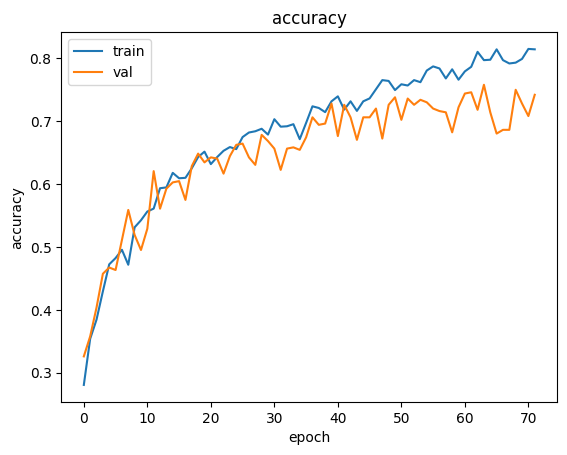

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('accuracy')
plt.show()

**Loss**

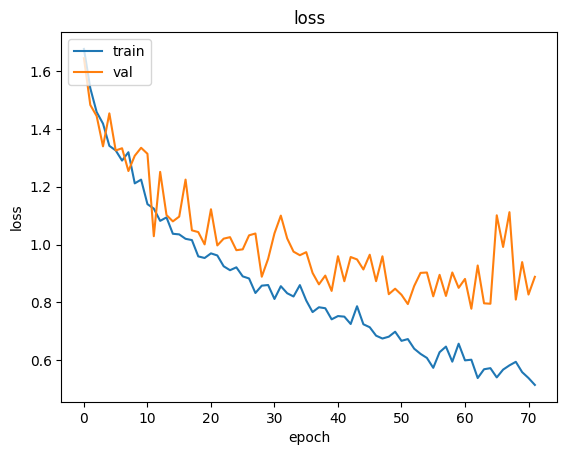

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('loss')
plt.show()

# **Evaluating**

**Confusion Matrix**

In [ ]:
test_model = tf.keras.models.load_model('/content/garbage_model.h5')

In [ ]:
test_labels = test_datagen.classes
predictions = test_model.predict(test_datagen, steps=test_datagen.samples, verbose=1)

510/510 [==============================] - 2s 3ms/step


In [ ]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

cm_plot_labels = ['paper', 'cardboard', 'trash', 'metal', 'glass', 'plastic']

Confusion matrix, without normalization
[[ 71   0   2   8   1   0]
 [  1  73   6   2  12   7]
 [  1   9  59   3   1   9]
 [  1   1   2 104   5   7]
 [  3   6   7   6  72   3]
 [  0   0   2   0   1  25]]


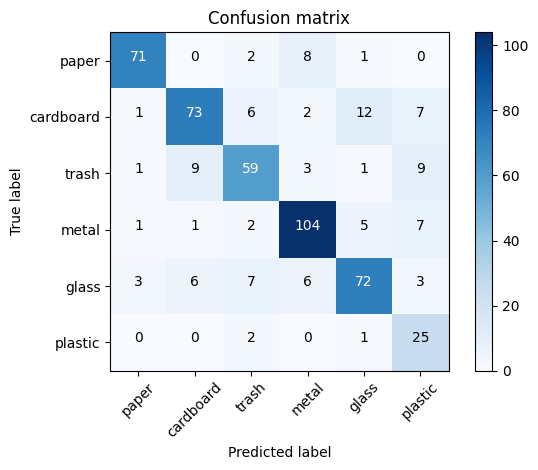

In [ ]:
plot_confusion_matrix(cm, cm_plot_labels)

In [ ]:
y_pred = np.argmax(predictions, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_labels, y_pred))
print('Classification Report')
print(classification_report(test_labels, y_pred, target_names=cm_plot_labels))


Confusion Matrix
[[ 71   0   2   8   1   0]
 [  1  73   6   2  12   7]
 [  1   9  59   3   1   9]
 [  1   1   2 104   5   7]
 [  3   6   7   6  72   3]
 [  0   0   2   0   1  25]]
Classification Report
              precision    recall  f1-score   support

       paper       0.92      0.87      0.89        82
   cardboard       0.82      0.72      0.77       101
       trash       0.76      0.72      0.74        82
       metal       0.85      0.87      0.86       120
       glass       0.78      0.74      0.76        97
     plastic       0.49      0.89      0.63        28

    accuracy                           0.79       510
   macro avg       0.77      0.80      0.77       510
weighted avg       0.81      0.79      0.80       510

